<a href="https://colab.research.google.com/github/NachoDave/Automated-Vehicle-Anomalous-Driving-Behaviour/blob/main/CAMs_Autoencoder_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Create/define folder
import os

dataset_dir = '/content/drive/MyDrive/datasets/car_hacking'
# os.makedirs(dataset_dir, exist_ok=True)

In [3]:
# Download car-hacking dataset
!pip install kagglehub

import kagglehub
import shutil

# Download dataset
# path = kagglehub.dataset_download("pranavjha24/car-hacking-dataset")
# print("Downloaded to:", path)

# # Copy everything to Google Drive folder
# shutil.copytree(path, dataset_dir, dirs_exist_ok=True)

# print("Dataset saved to Google Drive at:", dataset_dir)


In [4]:
# Access dataset
from google.colab import drive
import pandas as pd

rpm_df = pd.read_csv(f"{dataset_dir}/RPM_dataset.csv", header=None)

rpm_df.head(n = 10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.478191e+09,0316,8,05,22,68,09,22,20,00,75,R
1,1.478191e+09,018f,8,fe,3b,00,00,00,3c,00,00,R
2,1.478191e+09,0260,8,19,22,22,30,ff,8f,6e,3f,R
3,1.478191e+09,02a0,8,60,00,83,1d,96,02,bd,00,R
4,1.478191e+09,0329,8,dc,b8,7e,14,11,20,00,14,R
5,1.478191e+09,0545,8,d8,00,00,83,00,00,00,00,R
6,1.478191e+09,02c0,8,15,00,00,00,00,00,00,00,R
7,1.478191e+09,0002,8,00,00,00,00,00,07,09,06,R
8,1.478191e+09,0153,8,00,21,10,ff,00,ff,00,00,R
9,1.478191e+09,0130,8,03,80,00,ff,2e,80,09,ee,R


In [ ]:
DoS_df = pd.read_csv(f"{dataset_dir}/DoS_dataset.csv", header = None)

DoS_df.head(n = 10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.478198e+09,0316,8,05,21,68,09,21,21,00,6f,R
1,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
2,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
3,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R
5,1.478198e+09,0545,8,d8,00,00,8a,00,00,00,00,R
6,1.478198e+09,0002,8,00,00,00,00,00,03,0b,11,R
7,1.478198e+09,0153,8,00,21,10,ff,00,ff,00,00,R
8,1.478198e+09,02c0,8,14,00,00,00,00,00,00,00,R
9,1.478198e+09,0130,8,08,80,00,ff,31,80,0b,7f,R


In [ ]:
DoS_df.iloc[:][2].min(), DoS_df.iloc[:][2].unique()

(2, array([8, 2]))

In [ ]:
DoS_df[DoS_df.iloc[:][2] == 2][:][1].unique()

array(['05f0'], dtype=object)

## Data Exploration


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

##Convert HEX to int

In [ ]:
rpm_df.iloc[0:5][3], rpm_df.iloc[0:5][3].apply(int,base=16)

(0    05
 1    fe
 2    19
 3    60
 4    dc
 Name: 3, dtype: object,
 0      5
 1    254
 2     25
 3     96
 4    220
 Name: 3, dtype: int64)

In [ ]:
rpm_df.iloc[0][0]

np.float64(1478191030.045114)

In [ ]:
rpm_df.shape, DoS_df.shape

((4621702, 12), (3665771, 12))

(array([1.668870e+05, 1.050000e+03, 1.710232e+06, 1.715600e+04,
        4.187570e+05, 3.319420e+05, 0.000000e+00, 2.142760e+05,
        4.350230e+05, 9.920900e+04, 1.056800e+04, 3.180000e+03,
        0.000000e+00, 2.393000e+03, 8.924000e+03, 7.232000e+03,
        1.320400e+04, 8.189000e+03, 0.000000e+00, 1.377000e+03,
        6.548970e+05, 2.843000e+03, 3.717000e+03, 5.377800e+04,
        0.000000e+00, 1.710700e+04, 7.371000e+03, 1.235600e+04,
        1.438300e+04, 5.700000e+02, 8.845000e+03, 0.000000e+00,
        9.220000e+02, 3.323000e+03, 2.221000e+03, 1.308000e+03,
        4.553000e+03, 0.000000e+00, 8.993000e+03, 6.631000e+03,
        6.960000e+03, 9.978000e+03, 8.191000e+03, 0.000000e+00,
        8.525000e+03, 3.031000e+03, 8.282000e+03, 9.606000e+03,
        1.356800e+04, 0.000000e+00, 1.091000e+04, 6.174000e+03,
        6.818000e+03, 1.434600e+04, 6.275000e+03, 1.253700e+04,
        0.000000e+00, 2.114000e+04, 1.694000e+03, 4.940000e+02,
        3.810000e+02, 1.110000e+02, 0.00

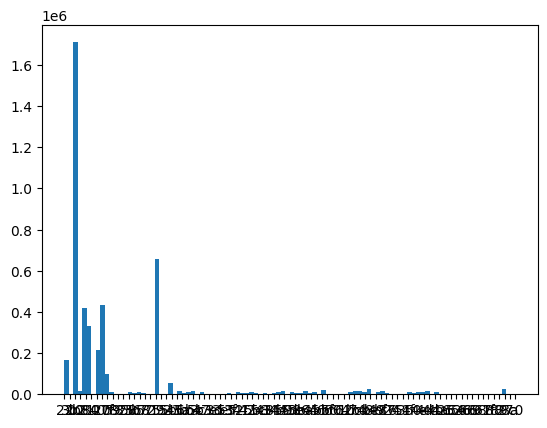

In [ ]:
plt.hist(rpm_df.iloc[:][4], bins = 100)

In [ ]:
# Get the number of CAM Ids
rpm_df[1].nunique()

26

In [ ]:
rpm_df[1].apply(int,base=16).unique(), rpm_df[1].nunique()

(array([ 790,  399,  608,  672,  809, 1349,  704,    2,  339,  304,  305,
         320, 1087,  880, 1088,  848, 1264, 1072, 1201,  497, 1680, 1520,
         160,  161, 1440, 1442]),
 26)

In [ ]:
rpm_df[1].value_counts()

,count
1,
0316,871231
018f,218180
0002,216546
0260,216523
0153,216260
02c0,214882
02a0,214876
0370,214354
043f,214276
